In [36]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

In [37]:
# Load data
delays = []
measurements = []
filenames = os.listdir('./data/blinking/')

for file in filenames:
    pattern = r'([0-9]+)-([0-9]+),([0-9]+)(.*)'
        
    match = re.match(pattern, file)
    
    start = int(match.group(1))
    end = int(match.group(2))
    step = int(match.group(3))
                
    delays.append(list(range(start, end + step, step)))
    measurements.append(np.load(os.path.join('./data/blinking/', file)))

/tmp/ipykernel_3869/1457890077.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  clb = plt.colorbar(cmap, ticks=range(start, end, 10))


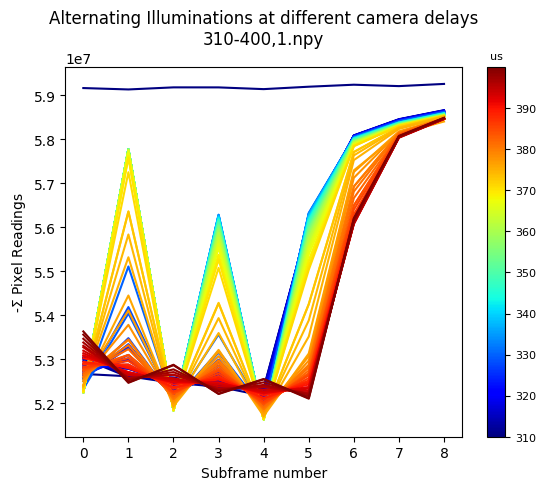

In [38]:
for filename, delays, videos in zip(filenames, delays, measurements):
    plt.figure()
    delays = np.asarray(delays)

    norm = mpl.colors.Normalize(vmin=delays.min(), vmax=delays.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])

    for i, (delay, vid) in enumerate(zip(delays, videos)):
        brightness = [-frame.sum() for frame in vid]
        
        plt.xlabel("Subframe number")
        plt.ylabel("-$\Sigma$ Pixel Readings")
        plt.title(f"Alternating Illuminations at different camera delays\n{filename}", y=1.04)
        plt.plot(brightness, c=cmap.to_rgba(delay))
        
    clb = plt.colorbar(cmap, ticks=range(start, end, 10))
    clb.ax.tick_params(labelsize=8) 
    clb.ax.set_title('us', fontsize=8)